In [ ]:
pip install mlxtend


In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [ ]:
def read_data(csv):
    return pd.read_csv(csv)

In [ ]:
data = read_data("/content/kag_risk_factors_cervical_cancer.csv")
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
data.replace("?", np.nan, inplace=True)

In [ ]:
#count nan values for each column
data.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
data = data.apply(pd.to_numeric)

In [ ]:

# replace unknown values with mean of column
def remove_unknowns(data):
    i = 0
    while i < data.shape[1]:
        if data.count().iloc[i] < data.shape[0]/2:
            data.drop(axis=1, labels=[data.columns[i]], inplace=True)
            i -= 1
        i += 1
    column_means = round(data.mean())
    data.fillna(column_means, inplace = True)
    return data

In [ ]:
data = remove_unknowns(data)

In [ ]:
# Features to analyze
features = data.loc[0:857, ['Age', 'Number of sexual partners', 'First sexual intercourse',
                             'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                             'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                             'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
                             'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                             'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                             'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
                             'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
                             'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
                             'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
                             'Citology', 'Biopsy']]

# Target variable
Dx_Cancer = data.loc[0:857, 'Dx:Cancer']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, Dx_Cancer, test_size=0.2, random_state=42)

Accuracy of RFensemble300: 0.99
Accuracy of RFensemble300_mtry1: 0.97
Accuracy of RFensemble500: 0.99


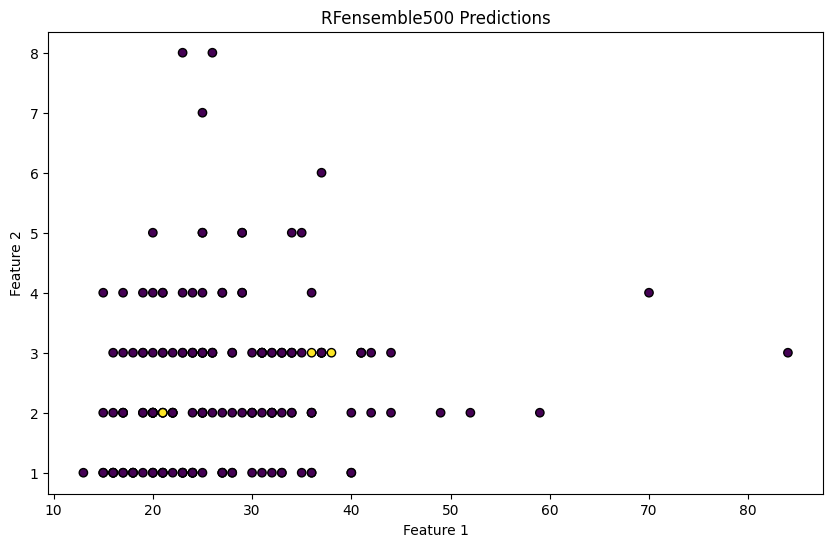

Feature Importance:
Age: 0.0459
Number of sexual partners: 0.0190
First sexual intercourse: 0.0377
Num of pregnancies: 0.0300
Smokes: 0.0035
Smokes (years): 0.0244
Smokes (packs/year): 0.0247
Hormonal Contraceptives: 0.0074
Hormonal Contraceptives (years): 0.0346
IUD: 0.0092
IUD (years): 0.0213
STDs: 0.0030
STDs (number): 0.0048
STDs:condylomatosis: 0.0009
STDs:cervical condylomatosis: 0.0000
STDs:vaginal condylomatosis: 0.0000
STDs:vulvo-perineal condylomatosis: 0.0010
STDs:syphilis: 0.0001
STDs:pelvic inflammatory disease: 0.0000
STDs:genital herpes: 0.0000
STDs:molluscum contagiosum: 0.0000
STDs:AIDS: 0.0000
STDs:HIV: 0.0006
STDs:Hepatitis B: 0.0000
STDs:HPV: 0.0294
STDs: Number of diagnosis: 0.0022
Dx:CIN: 0.0276
Dx:HPV: 0.4203
Dx: 0.2129
Hinselmann: 0.0061
Schiller: 0.0065
Citology: 0.0161
Biopsy: 0.0109


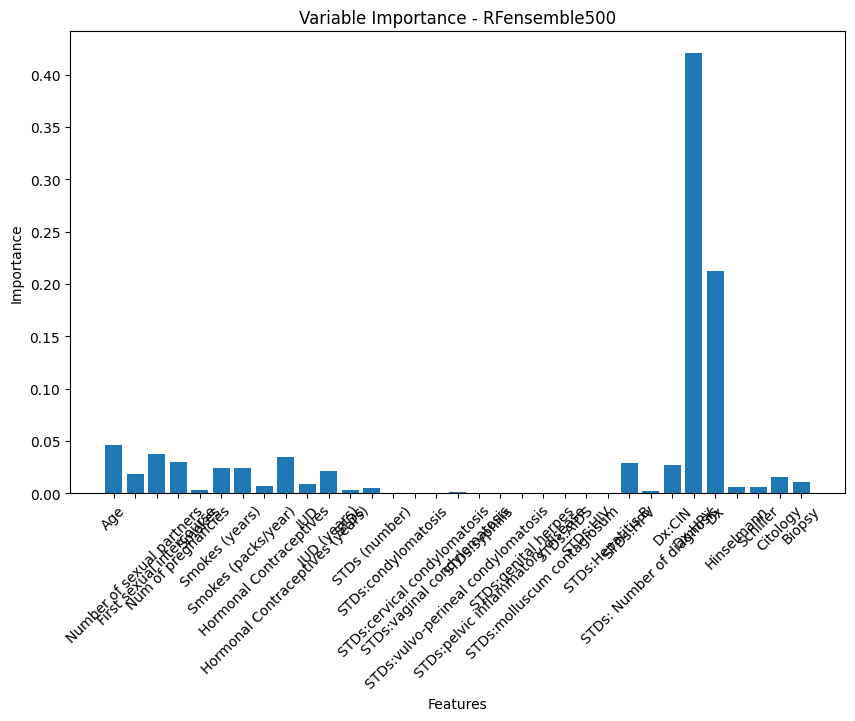

In [ ]:
RFensemble300 = RandomForestClassifier(n_estimators=300, random_state=42)
RFensemble300.fit(X_train, y_train)

# Display the accuracy of the RFensemble300 model on the test set
y_pred300 = RFensemble300.predict(X_test)
accuracy300 = accuracy_score(y_test, y_pred300)
print(f"Accuracy of RFensemble300: {accuracy300:.2f}")

# Fit a Random Forest ensemble model with 300 trees and mtry=1
RFensemble300_mtry1 = RandomForestClassifier(n_estimators=300, max_features=1, random_state=42)
RFensemble300_mtry1.fit(X_train, y_train)

# Display the accuracy of the RFensemble300_mtry1 model on the test set
y_pred300_mtry1 = RFensemble300_mtry1.predict(X_test)
accuracy300_mtry1 = accuracy_score(y_test, y_pred300_mtry1)
print(f"Accuracy of RFensemble300_mtry1: {accuracy300_mtry1:.2f}")

# Fit a Random Forest ensemble model with 500 trees
RFensemble500 = RandomForestClassifier(n_estimators=500, random_state=42)
RFensemble500.fit(X_train, y_train)

# Display the accuracy of the RFensemble500 model on the test set
y_pred500 = RFensemble500.predict(X_test)
accuracy500 = accuracy_score(y_test, y_pred500)
print(f"Accuracy of RFensemble500: {accuracy500:.2f}")

# Create a plot of the RFensemble500 model (assuming two features for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='viridis', marker='o', edgecolors='k')
plt.title('RFensemble500 Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Calculate feature importance for the RFensemble500 model
feature_importance = RFensemble500.feature_importances_
print("Feature Importance:")
for feature, importance in zip(features.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

# Create a variable importance plot for the RFensemble500 model
plt.figure(figsize=(10, 6))
plt.bar(features.columns, feature_importance)
plt.title('Variable Importance - RFensemble500')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

Confusion Matrix for RFensemble300:
[[166   1]
 [  0   5]]

Confusion Matrix for RFensemble300_mtry1:
[[167   0]
 [  5   0]]

Confusion Matrix for RFensemble500:
[[166   1]
 [  0   5]]


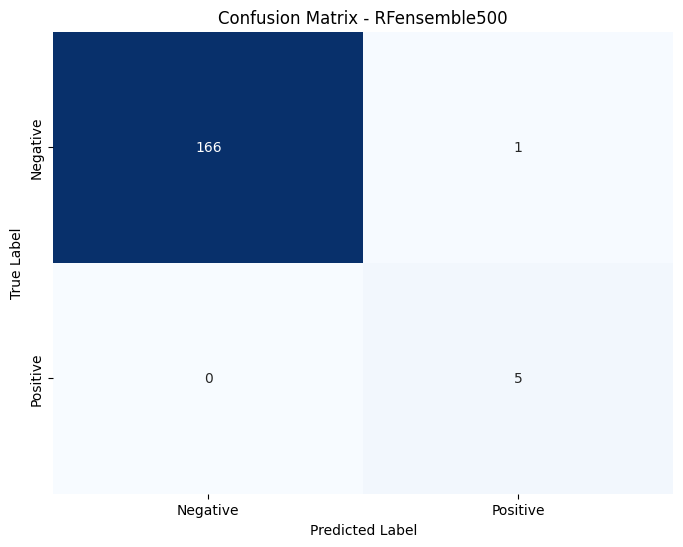

In [ ]:

conf_matrix_300 = confusion_matrix(y_test, y_pred300)
print("Confusion Matrix for RFensemble300:")
print(conf_matrix_300)

# Confusion matrix for RFensemble300_mtry1
conf_matrix_300_mtry1 = confusion_matrix(y_test, y_pred300_mtry1)
print("\nConfusion Matrix for RFensemble300_mtry1:")
print(conf_matrix_300_mtry1)

# Confusion matrix for RFensemble500
conf_matrix_500 = confusion_matrix(y_test, y_pred500)
print("\nConfusion Matrix for RFensemble500:")
print(conf_matrix_500)

# Plot confusion matrix for RFensemble500
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_500, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - RFensemble500')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Confusion Matrix:
[[166   1]
 [  2   3]]


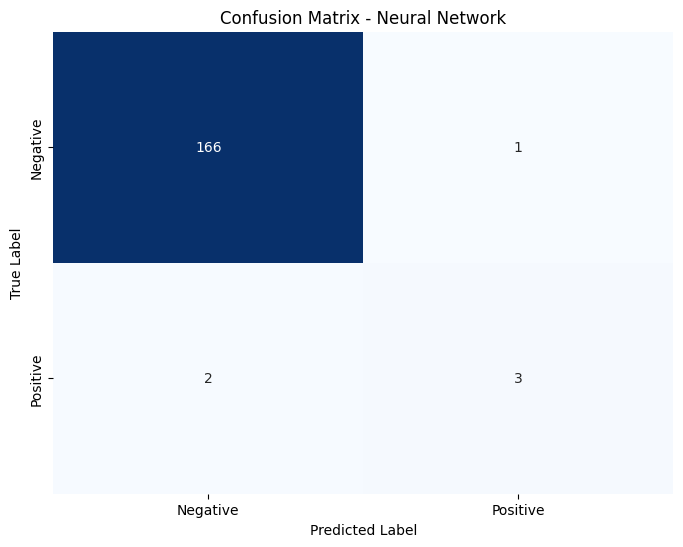

In [ ]:
#Train Data
x_train, x_test, y_train, y_test = train_test_split(features, Dx_Cancer, test_size=0.2, random_state=42)

# Create a neural network model
nn = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)

# Train the model
nn.fit(x_train, y_train)

# Predict results
y_pred = nn.predict(x_test)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


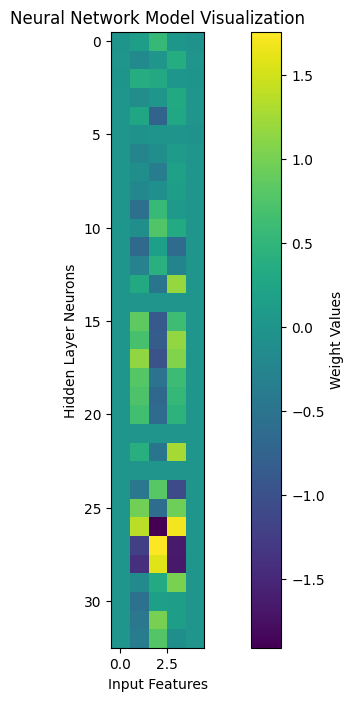

In [ ]:
# Plot the neural network model
plt.figure(figsize=(12, 8))
plt.title('Neural Network Model Visualization')
plt.imshow(nn.coefs_[0], interpolation='none', cmap='viridis')
plt.xlabel('Input Features')
plt.ylabel('Hidden Layer Neurons')
plt.colorbar(orientation='vertical', pad=0.05, label='Weight Values')
plt.show()